Analisys over the propagation vs recoverd of COVID-19 in Brazil.
<br>
Análise sobre a propagação vs recuperados de COVID-19 no Brasil.<p>

Created by <b>Giovanni Alves</b> e <b>Anna Yukimi</b><br>
Criado por <b>Giovanni Alves</b> e <b>Anna Yukimi</b>

Here i will show some analysis over the data found in that site: https://covid.saude.gov.br/
<br>
Aqui irei mostrar algumas análises dos dados encontrados nesse site: https://covid.saude.gov.br/

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False 
%matplotlib notebook


In [70]:
#usecols=['x', 'y', 'z']) para ler só certas tabelas, em que x y e z são os NOMES das tabelas
df = pd.read_csv(r'C:\Users\giova\github\Cure-analysis-Covid-19-Brazil\HIST_PAINEL_COVIDBR_03jul2020.csv', delimiter=';')
#abre o arquivo com a codificação utf-8 

In [62]:
for k in range(17): print (k, df.columns[k]) #pega todas as colunas do CVS

0 regiao
1 estado
2 municipio
3 coduf
4 codmun
5 codRegiaoSaude
6 nomeRegiaoSaude
7 data
8 semanaEpi
9 populacaoTCU2019
10 casosAcumulado
11 casosNovos
12 obitosAcumulado
13 obitosNovos
14 Recuperadosnovos
15 emAcompanhamentoNovos
16 interior/metropolitana


In [40]:
df  #informações referentes a quantidade de linhas, colunas, conteudo, mostra as 5 priemiras linhas e 5 ultimas

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535859,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,29/06/2020,27,3015268,47071,2166,559,11,NaN,NaN,1.0
535860,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,30/06/2020,27,3015268,49218,2147,587,28,NaN,NaN,1.0
535861,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,01/07/2020,27,3015268,50676,1458,620,33,NaN,NaN,1.0
535862,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,02/07/2020,27,3015268,52281,1605,631,11,NaN,NaN,1.0


In [41]:
df.info() ##como a data está como string, devemos alterar pata datatime para a formatação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535864 entries, 0 to 535863
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   regiao                  535864 non-null  object 
 1   estado                  535734 non-null  object 
 2   municipio               530145 non-null  object 
 3   coduf                   535864 non-null  int64  
 4   codmun                  532224 non-null  float64
 5   codRegiaoSaude          530145 non-null  float64
 6   nomeRegiaoSaude         530145 non-null  object 
 7   data                    535864 non-null  object 
 8   semanaEpi               535864 non-null  int64  
 9   populacaoTCU2019        533785 non-null  object 
 10  casosAcumulado          535864 non-null  int64  
 11  casosNovos              535864 non-null  int64  
 12  obitosAcumulado         535864 non-null  int64  
 13  obitosNovos             535864 non-null  int64  
 14  Recuperadosnovos    

In [71]:
df['data'] = pd.to_datetime(df['data']) ## aqui é feita a conversão para datatime

In [72]:
df['data'] = df['data'].dt.strftime('%d/%m') ##formatação da data para melhor vizualização(dd/mm/aa é um exagero de informação)

In [44]:
df.loc[df['regiao']=='Brasil'].tail(10) 

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
120,Brasil,NaN,NaN,76,NaN,NaN,NaN,24/06,26,210147125,1188631,42725,53830,1185,649908.0,484893.0,NaN
121,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/06,26,210147125,1228114,39483,54971,1141,673729.0,499414.0,NaN
122,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/06,26,210147125,1274974,46860,55961,990,697526.0,521487.0,NaN
123,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/06,26,210147125,1313667,38693,57070,1109,715905.0,540692.0,NaN
124,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/06,27,210147125,1344143,30476,57622,552,733848.0,552673.0,NaN
125,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/06,27,210147125,1368195,24052,58314,692,757462.0,552419.0,NaN
126,Brasil,NaN,NaN,76,NaN,NaN,NaN,30/06,27,210147125,1402041,33846,59594,1280,790040.0,552407.0,NaN
127,Brasil,NaN,NaN,76,NaN,NaN,NaN,07/01,27,210147125,1448753,46712,60632,1038,826866.0,561255.0,NaN
128,Brasil,NaN,NaN,76,NaN,NaN,NaN,07/02,27,210147125,1496858,48105,61884,1252,852816.0,582158.0,NaN
129,Brasil,NaN,NaN,76,NaN,NaN,NaN,07/03,27,210147125,1539081,42223,63174,1290,868372.0,607535.0,NaN


<IPython.core.display.Javascript object>


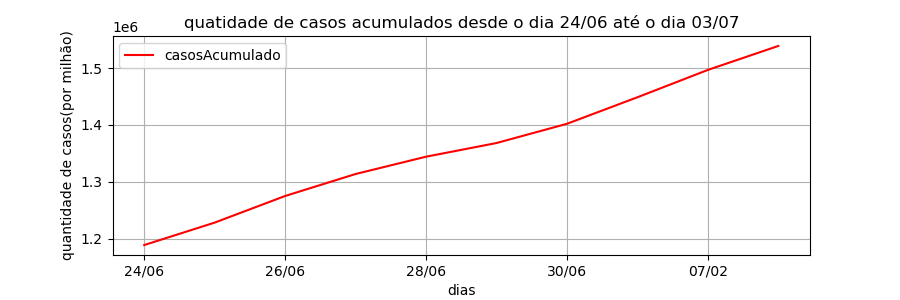

Text(0.5, 0, 'dias')

In [139]:
br = df.query('regiao == "Brasil" ')
br.tail(10).plot(x='data',y='casosAcumulado', figsize=(9,3), grid=True, color ='red')
plt.gcf().subplots_adjust(bottom=0.15)
## quatidade de casos novos diários desde o 125° dia da pandemia no brasil até o 129°(dia 03/07/2020)

plt.title('quatidade de casos acumulados desde o dia 24/06 até o dia 03/07')
plt.ylabel('quantidade de casos(por milhão)')
plt.xlabel('dias')

<IPython.core.display.Javascript object>


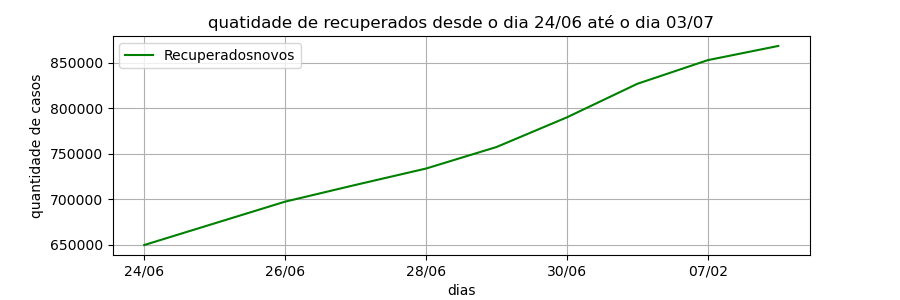

<IPython.core.display.Javascript object>


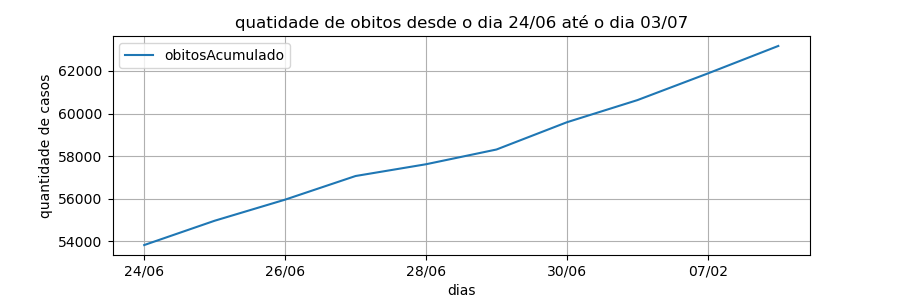

Text(0.5, 0, 'dias')

In [138]:
rec = df.query('regiao == "Brasil" ')
rec.tail(10).plot(x='data',y='Recuperadosnovos', figsize=(9,3), grid=True, color='green')
plt.gcf().subplots_adjust(bottom=0.15)##usado pra não cortar a xlabel

plt.title('quatidade de recuperados desde o dia 24/06 até o dia 03/07')
plt.ylabel('quantidade de casos')
plt.xlabel('dias')
## quatidade do aumento de recuperados desde o 125° dia da pandemia no brasil até o 129°(dia 03/07/2020)

rec.tail(10).plot(x='data',y='obitosAcumulado', figsize=(9,3), grid=True)
plt.gcf().subplots_adjust(bottom=0.15)

plt.title('quatidade de obitos desde o dia 24/06 até o dia 03/07')
plt.ylabel('quantidade de casos')
plt.xlabel('dias')

In [73]:
# Excluindo as colunas que não vão ser usadas
df = df.drop(["emAcompanhamentoNovos", "coduf", "codmun", "codRegiaoSaude", "nomeRegiaoSaude","semanaEpi", "populacaoTCU2019", "interior/metropolitana"], axis=1)


In [191]:
# pegando os cinco municípios com o maior numero de infectados em >>um dia<<
estouro = df.groupby(["regiao", "estado", "municipio"]).max().sort_values(by='casosNovos', ascending=False).head()


In [117]:
##separando as linhas dos dias que mais ouve infectados

sp_est = estouro.query('municipio == "São Paulo" ')

sa_est = estouro.query('municipio == "Salvador" ')

ub_est = estouro.query('municipio == "Uberlândia" ')

rj_est = estouro.query('municipio == "Rio de Janeiro" ')

ma_est = estouro.query('municipio == "Macapá" ')



In [129]:
#pegando o ultimo dia que tem no CSV desses mesmos municípios

rec = df.query('municipio == "São Paulo" ')
sp_cn = rec.tail(1).sort_values(by='casosNovos', ascending=False)

rec = df.query('municipio == "Salvador" ')
sa_cn = rec.tail(1).sort_values(by='casosNovos', ascending=False)

rec = df.query('municipio == "Uberlândia" ')
ub_cn = rec.tail(1).sort_values(by='casosNovos', ascending=False)

rec = df.query('municipio == "Rio de Janeiro" ')
rj_cn = rec.tail(1).sort_values(by='casosNovos', ascending=False)

rec = df.query('municipio == "Macapá" ')
ma_cn = rec.tail(1).sort_values(by='casosNovos', ascending=False)



In [193]:

xdata1 = ['31/05']
xdata2 = ['03/07']

# create some y data points
ydata1 = [2, 1500]
ydata2 = np.array(sa_est['casosNovos'].max())
ydata3 = ub_est['casosNovos'].max()
ydata4 = rj_est['casosNovos'].max()
ydata5 = np.array(ma_est['casosNovos'].max())

# plot the data
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(xdata1, ydata1, color='tab:blue')
ax.plot(xdata2, ydata2, color='tab:orange')



# set the limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 7000])

ax.set_title('grafico para interpretação do nivel de contaminação diária')

# display the plot
plt.show()

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

In [178]:
ax